# Datetime Index with Pandas

In [67]:
from datetime import datetime
from matplotlib import dates

In [3]:
my_year = 2020
my_month = 1
my_day = 2
my_hour = 13 #24 hour format
my_min = 30
my_sec = 15

In [4]:
my_date = datetime(my_year, my_month, my_day)

In [5]:
my_date

datetime.datetime(2020, 1, 2, 0, 0)

In [6]:
my_date_time = datetime(my_year, my_month, my_day, my_hour, my_min, my_sec)
my_date_time

datetime.datetime(2020, 1, 2, 13, 30, 15)

In [7]:
#Can look at a specific attribute
my_date_time.day

2

In [8]:
import numpy as np 

In [9]:
#looking at dates with numpy
np.array(['2020-03-15','2020-03-16','2020-03-17'], dtype = 'datetime64')

array(['2020-03-15', '2020-03-16', '2020-03-17'], dtype='datetime64[D]')

In [10]:
np.arange(0,10,2)

array([0, 2, 4, 6, 8])

In [11]:
#You can create ranges using numpys `arange()` function
np.arange('2018-06-01','2018-06-23', 7, dtype = 'datetime64[D]')

array(['2018-06-01', '2018-06-08', '2018-06-15', '2018-06-22'],
      dtype='datetime64[D]')

In [12]:
import pandas as pd 
pd.date_range('2020-01-01', periods = 7, freq = 'D')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [13]:
#pandas is really good at inferring string codes as well
pd.date_range('Jan 01, 2018', periods = 7, freq = 'D')

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07'],
              dtype='datetime64[ns]', freq='D')

In [14]:
pd.to_datetime(['1/2/2018','Jan 03, 2018'])

DatetimeIndex(['2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [15]:
#using format to look at Europian time -- day, month, year
pd.to_datetime(['1/2/2018','1/3/2018'], format= '%d/%m/%Y')

DatetimeIndex(['2018-02-01', '2018-03-01'], dtype='datetime64[ns]', freq=None)

In [16]:
data = np.random.randn(3,2)
cols = ['A', 'B']
print(data)

[[-0.76721663 -1.41347896]
 [-0.22150687 -0.20794818]
 [-1.23448939  1.20482746]]


In [17]:
idx = pd.date_range('2020-01-01',periods=3, freq = 'D')
df = pd.DataFrame(data, index = idx, columns = cols)
df

,A,B
2020-01-01,-0.767217,-1.413479
2020-01-02,-0.221507,-0.207948
2020-01-03,-1.234489,1.204827


In [18]:
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03'], dtype='datetime64[ns]', freq='D')

In [19]:
#Above you can see that these are datetime values

In [20]:
print(df.index.max())
print(df.index.argmax())

2020-01-03 00:00:00
2


## Time Resampling

In [24]:
df = pd.read_csv(r'C:\Users\chris\OneDrive\Personal Python Projects\UDEMY_TSA_FINAL\Data\starbucks.csv', index_col = 'Date', parse_dates= True)
df

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548
...,...,...
2018-12-24,60.5600,6323252
2018-12-26,63.0800,16646238
2018-12-27,63.2000,11308081


In [25]:
#resample daily to yearly
df.resample(rule = 'A').mean()

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


In [26]:
def first_day(entry): 
    #is there an entry? 
    if len(entry) != 0: 
        #if so return first entry
        return entry[0]

In [28]:
df.resample(rule = 'A').apply(first_day)

,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2016-12-31,55.0780,13521544
2017-12-31,53.1100,7809307
2018-12-31,56.3243,7215978


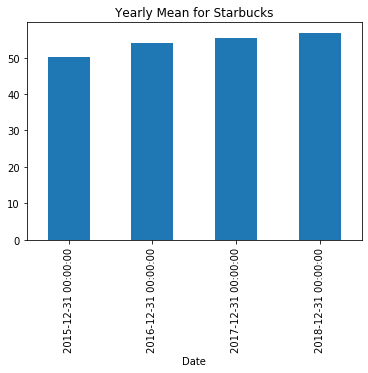

In [31]:
df['Close'].resample('A').mean().plot.bar(title = "Yearly Mean for Starbucks")

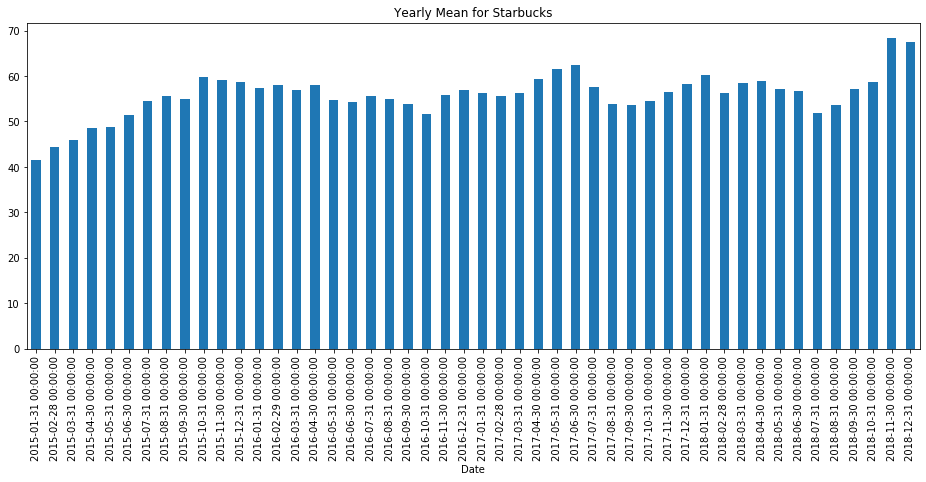

In [33]:
df['Close'].resample('M').max().plot.bar(figsize = (16,6), title = "Yearly Mean for Starbucks")

## Time Shifting

In [37]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [36]:
# When we shift, we lose the last rows
df.shift(1)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,38.0061,6906098.0
2015-01-06,37.2781,11623796.0
2015-01-07,36.9748,7664340.0
2015-01-08,37.8848,9732554.0
...,...,...
2018-12-24,61.3900,23524888.0
2018-12-26,60.5600,6323252.0
2018-12-27,63.0800,16646238.0


In [38]:
# OR you can shift backwards
df.shift(-1)

,Close,Volume
Date,,
2015-01-02,37.2781,11623796.0
2015-01-05,36.9748,7664340.0
2015-01-06,37.8848,9732554.0
2015-01-07,38.4961,13170548.0
2015-01-08,37.2361,27556706.0
...,...,...
2018-12-24,63.0800,16646238.0
2018-12-26,63.2000,11308081.0
2018-12-27,63.3900,7712127.0


In [39]:
df.shift(periods = 1, freq='M')

,Close,Volume
Date,,
2015-01-31,38.0061,6906098
2015-01-31,37.2781,11623796
2015-01-31,36.9748,7664340
2015-01-31,37.8848,9732554
2015-01-31,38.4961,13170548
...,...,...
2018-12-31,60.5600,6323252
2018-12-31,63.0800,16646238
2018-12-31,63.2000,11308081


## Rolling and Expanding

In [41]:
df = pd.read_csv(r'C:\Users\chris\OneDrive\Personal Python Projects\UDEMY_TSA_FINAL\Data\starbucks.csv', index_col = 'Date', parse_dates= True)
df

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548
...,...,...
2018-12-24,60.5600,6323252
2018-12-26,63.0800,16646238
2018-12-27,63.2000,11308081


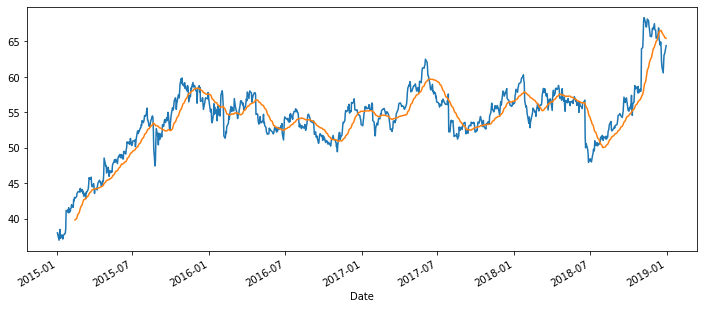

In [46]:
#window is based off the units in your dataset
df['Close'].plot(figsize = (12,5))
df.rolling(window = 30).mean()['Close'].plot()

In [47]:
df['Close: 30 Day Mean'] = df['Close'].rolling(window = 30).mean()
df


,Close,Volume,Close: 30 Day Mean
Date,,,
2015-01-02,38.0061,6906098,NaN
2015-01-05,37.2781,11623796,NaN
2015-01-06,36.9748,7664340,NaN
2015-01-07,37.8848,9732554,NaN
2015-01-08,38.4961,13170548,NaN
...,...,...,...
2018-12-24,60.5600,6323252,65.963703
2018-12-26,63.0800,16646238,65.791913
2018-12-27,63.2000,11308081,65.647000


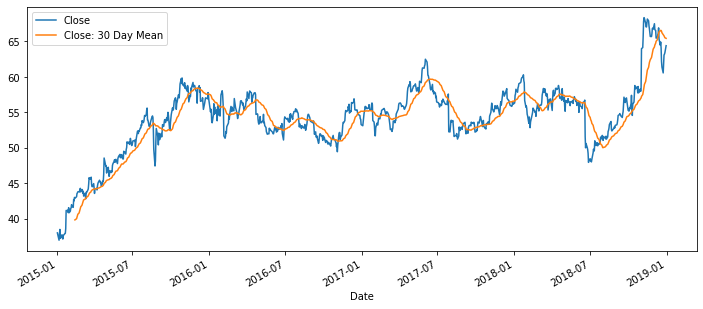

In [48]:
df[['Close', 'Close: 30 Day Mean']].plot(figsize=(12,5))

## Expanding 

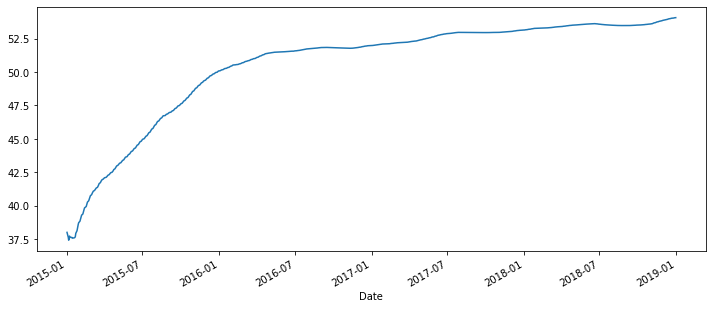

In [49]:
# This is essentially a moving aggregate since the beginning
df['Close'].expanding().mean().plot(figsize = (12,5))

## Visualizing Time Series Data

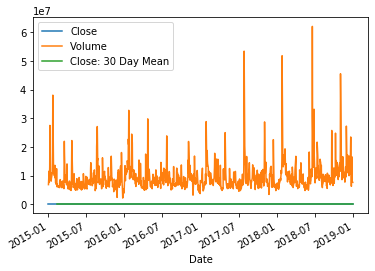

In [52]:
df.plot()

[Text(0, 0.5, 'Y Label'), Text(0.5, 0, 'X Label')]

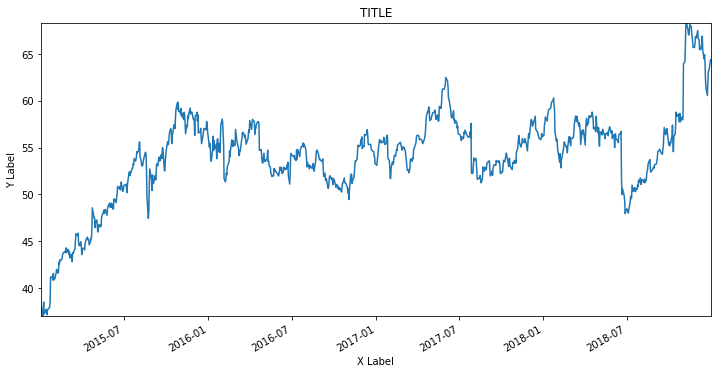

In [57]:
ax = df['Close'].plot(figsize = (12,6) , title = "TITLE")
ax.autoscale(axis = 'both', tight = True)
ax.set(ylabel = "Y Label", xlabel = "X Label")

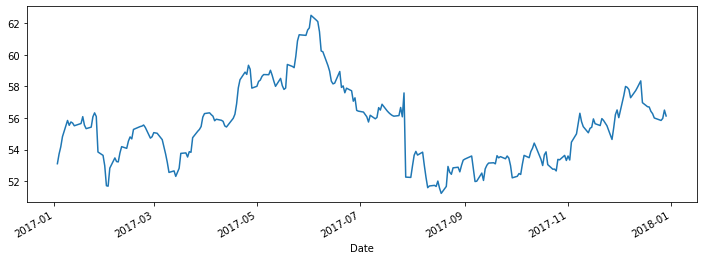

In [62]:
#Option 1 for editing X axis
df['Close']['2017-01-01':'2017-12-31'].plot(figsize = (12,4))

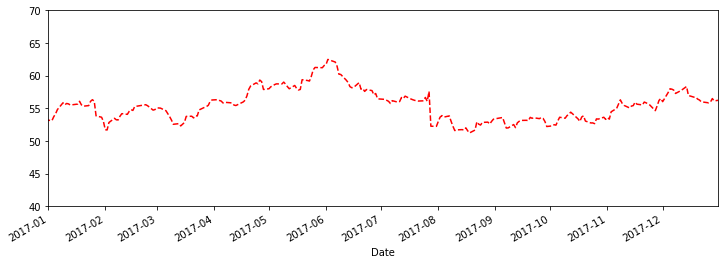

In [66]:
#option 2
df['Close'].plot(figsize=(12,4), xlim = ['2017-01-01','2017-12-31'], ylim = [40,70], ls = '--', c = 'red')

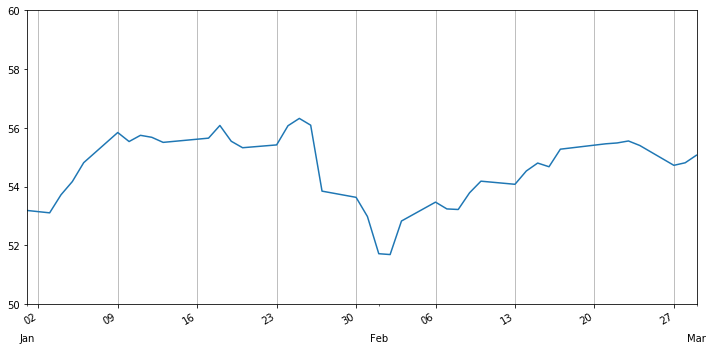

In [77]:
#adjusting x-ticks so that it uses weekday locators 0 instead of first of month
ax = df['Close'].plot(xlim = ['2017-01-01','2017-03-01'], ylim = [50,60], figsize = (12,6))
ax.set(xlabel = '')
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday = 0))
#you can adjust how th emonths look too
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))

#building a sub-axis
ax.xaxis.set_minor_locator(dates.MonthLocator())
#you can use 
#\n\n to put sub on new lines
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))

ax.xaxis.grid(True)